**Actividad 12 PLN**

Captura de información desde una red social.

In [ ]:
#Punto 1
#Solicite la cuenta de desarrollador de twitter.

In [1]:
#Se hace la instalación de libreria tweepy para acceder a la API de tweeter
!pip install tweepy

In [2]:
#Se importan las librerias
import tweepy
import pandas as pd
import json

In [3]:
#Obtener las claves de acceso.
#Desde la cuenta de desarrollo de tweeter
API_KEY ='YjV6Z0Qe5QB9PxPpzz2hpY9Rg'
API_SECRET_KEY ='D8uos5y8joj4yIJfWQaFDfdBmsKVbpvMgc6Jn6klYIgPHjTw9K'
ACCESS_TOKEN='148747151-hUgBCi8LC9AEddCELwcrsFuCLXj9nrdQqmszUkTc'
ACCESS_TOKEN_SECRET='DxxwraoQuKxbLG4vNC11idLlFOIdlZyfe77PvexeVxpvJ'

In [4]:
#Hacer la auteticación con el API de Tweeter
auth=tweepy.OAuth1UserHandler(API_KEY,API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
api=tweepy.API(auth,parser=tweepy.parsers.JSONParser())

In [ ]:
#Punto 2. Seleccione una tendencia en twitter
#Punto 3. Usando tweepy y la API de twitter cargue 500 trinos relacionados con la tendencia

In [5]:
#Se hace la búsqueda de la tendiancia que se escogio
tweets=api.search_tweets(q='Odebrecht', lang='es',tweet_mode='extended', count=500)

In [ ]:
#Punto 4 Cree una nube de palabras
#Punto 5 Documente en el notebook todo el proceso
#Revisar los comentarios


In [6]:
#Se hace la intalación de la libreria para graficar la nube de palabras
!pip install wordcloud

In [7]:
#Se hace la concatenación de los trinos resultado de la búqueda
texto=''
for  i in tweets['statuses']:
  texto=texto+i['full_text']

print(texto)

RT @NietoOP: Todos los que están atacando a Petro y evitando las reformas están untados directa e indirectamente con la corrupción de Odebr…RT @aplastapayasos: Hablé con el abogado @AUGUSTOOCAMPO y me contó que lo tienen tan amenazado, que tuvo que cerrar sus redes sociales y pr…RT @RafaNietoLoaiza: Los audios de OIZ muestran que Alex Vega, entonces presidente del CNE, pretendía dejar la financiación ilegal de Odebr…RT @datoatipico: En una semana:

Corte Suprema abre investigación a Ciro Ramírez.
Se conocen los audios de Oscar Ivan Zuluaga qué lo hunden…RT @SargentoIMIcol: García Arizabaleta es quien se sometió a principio de oportunidad delatando la corrupción de Óscar Ivana Zuluaga con Od…RT @FisicoImpuro: Que vaina que el tiempo SIEMPRE terminan dándole la razón a Petro. SIEMPRE!

Y vieron como la periodista (que ya ustedes…RT @gurozu: La historia se repite. Cuando USA exigió resultados, contra el cartel de Medellín Escobar entregó a Lehder, cuando ya no era na…RT @RafaNietoLoaiza: 

In [8]:
#Se importa la libreria para graficar
import matplotlib.pyplot as plt

In [9]:
#Se crea la nube de palabras
#para el atributo .generate(texto), se debe envíar en el argumento
#un texto no una lista
from wordcloud import WordCloud
wordCloud=WordCloud(
    background_color='white',
    contour_width=0.5,
    contour_color='black',
    max_words=200,
    width=800,
    height=800,
    max_font_size=100).generate(texto)

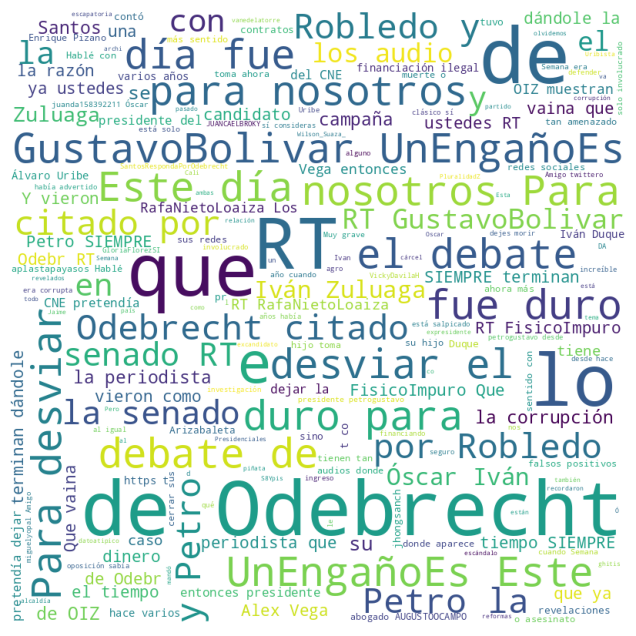

In [10]:
#Se grafica la nube de palabras
plt.figure(figsize=(8,8))
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [21]:
#se importa la libreria para separar en tokens el texto
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
word_tokens=word_tokenize(texto)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
#Se visualizan los primeros 20 tokens
word_tokens[:20]

['RT',
 '@',
 'NietoOP',
 ':',
 'Todos',
 'los',
 'que',
 'están',
 'atacando',
 'a',
 'Petro',
 'y',
 'evitando',
 'las',
 'reformas',
 'están',
 'untados',
 'directa',
 'e',
 'indirectamente']

In [13]:
#Se importa la libreria para quitar las palabra sin significado en el texto
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
#Se crea la lista con las palabras filtradas
from nltk.corpus import stopwords
stop_list_en=stopwords.words('spanish')

In [15]:
#Mejoramiento del texto
#Se crea la lista con las palabras que no sea stopwords
clean_word_token=[]
for token in word_tokens:
  if token not in stop_list_en:
    clean_word_token.append(token)

In [22]:
#Se imprimen las palabras filtradas sin stopwords
print(clean_word_token)

['RT', '@', 'NietoOP', ':', 'Todos', 'atacando', 'Petro', 'evitando', 'reformas', 'untados', 'directa', 'indirectamente', 'corrupción', 'Odebr…RT', '@', 'aplastapayasos', ':', 'Hablé', 'abogado', '@', 'AUGUSTOOCAMPO', 'contó', 'tan', 'amenazado', ',', 'cerrar', 'redes', 'sociales', 'pr…RT', '@', 'RafaNietoLoaiza', ':', 'Los', 'audios', 'OIZ', 'muestran', 'Alex', 'Vega', ',', 'entonces', 'presidente', 'CNE', ',', 'pretendía', 'dejar', 'financiación', 'ilegal', 'Odebr…RT', '@', 'datoatipico', ':', 'En', 'semana', ':', 'Corte', 'Suprema', 'abre', 'investigación', 'Ciro', 'Ramírez', '.', 'Se', 'conocen', 'audios', 'Oscar', 'Ivan', 'Zuluaga', 'hunden…RT', '@', 'SargentoIMIcol', ':', 'García', 'Arizabaleta', 'sometió', 'principio', 'oportunidad', 'delatando', 'corrupción', 'Óscar', 'Ivana', 'Zuluaga', 'Od…RT', '@', 'FisicoImpuro', ':', 'Que', 'vaina', 'tiempo', 'SIEMPRE', 'terminan', 'dándole', 'razón', 'Petro', '.', 'SIEMPRE', '!', 'Y', 'vieron', 'periodista', '(', 'ustedes…RT', '@', 'guroz

In [17]:
#Se limpias los token, seleccionando los token con una longitud mayor a 3
clean_len_word_tokens=[]
for token in clean_word_token:
  if len(token)>3:
    clean_len_word_tokens.append(token)

print(clean_len_word_tokens)

['NietoOP', 'Todos', 'atacando', 'Petro', 'evitando', 'reformas', 'untados', 'directa', 'indirectamente', 'corrupción', 'Odebr…RT', 'aplastapayasos', 'Hablé', 'abogado', 'AUGUSTOOCAMPO', 'contó', 'amenazado', 'cerrar', 'redes', 'sociales', 'pr…RT', 'RafaNietoLoaiza', 'audios', 'muestran', 'Alex', 'Vega', 'entonces', 'presidente', 'pretendía', 'dejar', 'financiación', 'ilegal', 'Odebr…RT', 'datoatipico', 'semana', 'Corte', 'Suprema', 'abre', 'investigación', 'Ciro', 'Ramírez', 'conocen', 'audios', 'Oscar', 'Ivan', 'Zuluaga', 'hunden…RT', 'SargentoIMIcol', 'García', 'Arizabaleta', 'sometió', 'principio', 'oportunidad', 'delatando', 'corrupción', 'Óscar', 'Ivana', 'Zuluaga', 'Od…RT', 'FisicoImpuro', 'vaina', 'tiempo', 'SIEMPRE', 'terminan', 'dándole', 'razón', 'Petro', 'SIEMPRE', 'vieron', 'periodista', 'ustedes…RT', 'gurozu', 'historia', 'repite', 'Cuando', 'exigió', 'resultados', 'cartel', 'Medellín', 'Escobar', 'entregó', 'Lehder', 'na…RT', 'RafaNietoLoaiza', 'audios', 'muestran', 'Ale

In [19]:
# concatenas las palbras de la lista clean_len_word_tokens en un string
text_q=''
for w in clean_len_word_tokens:
  vacio=' '
  text_q+=w+vacio

print(text_q)

NietoOP Todos atacando Petro evitando reformas untados directa indirectamente corrupción Odebr…RT aplastapayasos Hablé abogado AUGUSTOOCAMPO contó amenazado cerrar redes sociales pr…RT RafaNietoLoaiza audios muestran Alex Vega entonces presidente pretendía dejar financiación ilegal Odebr…RT datoatipico semana Corte Suprema abre investigación Ciro Ramírez conocen audios Oscar Ivan Zuluaga hunden…RT SargentoIMIcol García Arizabaleta sometió principio oportunidad delatando corrupción Óscar Ivana Zuluaga Od…RT FisicoImpuro vaina tiempo SIEMPRE terminan dándole razón Petro SIEMPRE vieron periodista ustedes…RT gurozu historia repite Cuando exigió resultados cartel Medellín Escobar entregó Lehder na…RT RafaNietoLoaiza audios muestran Alex Vega entonces presidente pretendía dejar financiación ilegal Odebr…RT amoralesan Pobrecito Uribe detrás ignoraba Odebrecht falsos positivos corrupción horrores.…RT GustavoBolivar UnEngañoEs Este duro Para desviar debate Odebrecht citado Robledo Petro senado…

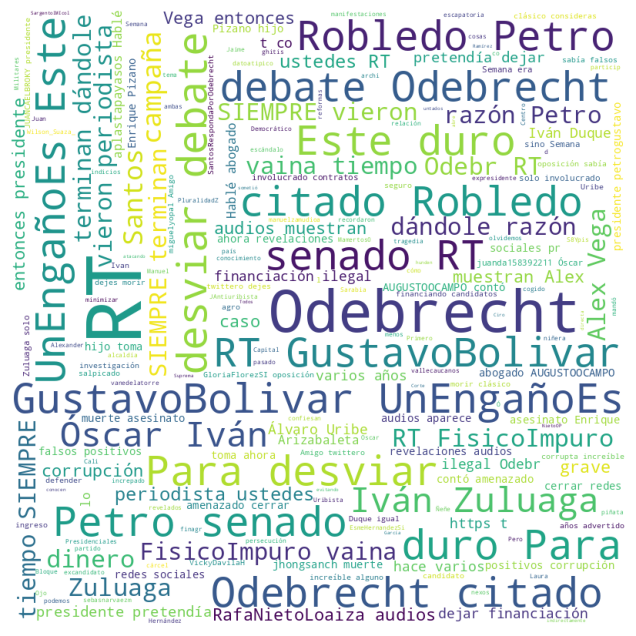

In [20]:
#Nueva nube de palabras
wordCloud=WordCloud(
    background_color='white',
    contour_width=0.5,
    contour_color='black',
    max_words=200,
    width=800,
    height=800,
    max_font_size=100).generate(text_q)

plt.figure(figsize=(8,8))
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [ ]:
#Concluya sobre lo observado en los datos, no del proceso
#Hacer un grafico de palabras frecuentes
#Conbcluir sobre la información de la nube palabras
#Ejemplo:
#Para esta selección de trinos, se evidencia que el nombre de personas involucradas en la tendencia
#son las palabras con mayor longitud de fuente en la nube de palabras